# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import sys
print(sys.path)

['C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38', '', 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python38\\site-packages\\setuptools\\_vendor']


### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 30

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'tomato_dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 11464 images belonging to 9 classes.


In [4]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato__Target_Spot': 5,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 6,
 'Tomato__Tomato_mosaic_virus': 7,
 'Tomato_healthy': 8}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6454878  0.5905858  0.5788211 ]
  [0.6660946  0.61119264 0.59942794]
  [0.6496135  0.59471154 0.58294684]
  ...
  [0.59113204 0.5362301  0.5323085 ]
  [0.5896945  0.53479254 0.530871  ]
  [0.58825696 0.53335494 0.52943337]]

 [[0.6435711  0.5886691  0.5769044 ]
  [0.6632194  0.60831743 0.5965527 ]
  [0.6544054  0.59950346 0.58773875]
  ...
  [0.58755255 0.5326506  0.528729  ]
  [0.588511   0.53360903 0.52968746]
  [0.5894694  0.5345674  0.53064585]]

 [[0.64165425 0.5867523  0.5749876 ]
  [0.6603443  0.60544235 0.59367764]
  [0.65919733 0.6042954  0.59253067]
  ...
  [0.5778466  0.5229446  0.51902306]
  [0.57353395 0.518632   0.5147104 ]
  [0.5692212  0.51431924 0.5103977 ]]

 ...

 [[0.6593089  0.61617166 0.6083285 ]
  [0.6554754  0.6123381  0.604495  ]
  [0.65164185 0.6085046  0.60066146]
  ...
  [0.3473613  0.30422404 0.31991032]
  [0.4089867  0.3658494  0.38153568]
  [0.40091142 0.35777417 0.37346044]]

 [[0.642337   0.5991998  0.59135664]
  [0.64137864 0.5982414  0.59039825]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'tomato_dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1430 images belonging to 9 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'tomato_dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1441 images belonging to 9 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5919611  0.54490227 0.54490227]
  [0.59162873 0.54456985 0.54456985]
  [0.5885485  0.54148966 0.54148966]
  ...
  [0.5616126  0.5223969  0.5263185 ]
  [0.5554173  0.5162016  0.5201232 ]
  [0.56924224 0.53002656 0.5339481 ]]

 [[0.62766963 0.58061075 0.58061075]
  [0.6272126  0.58015376 0.58015376]
  [0.6076304  0.56057155 0.56057155]
  ...
  [0.56136334 0.52214766 0.5260692 ]
  [0.55545884 0.51624316 0.5201647 ]
  [0.56945    0.53023434 0.5341559 ]]

 [[0.654902   0.60784316 0.60784316]
  [0.654902   0.60784316 0.60784316]
  [0.6235257  0.57646686 0.57646686]
  ...
  [0.57542664 0.53621095 0.5401325 ]
  [0.5731714  0.5339557  0.53787726]
  [0.582842   0.5436263  0.5475479 ]]

 ...

 [[0.53255975 0.4933441  0.48550096]
  [0.5510653  0.51184964 0.5040065 ]
  [0.53241515 0.49319947 0.48535633]
  ...
  [0.56340384 0.52418816 0.5202666 ]
  [0.4631469  0.42393118 0.4200096 ]
  [0.46439344 0.42517775 0.42125618]]

 [[0.5151326  0.47591692 0.4680738 ]
  [0.54258204 0.50336635 0.4955232 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
359/359 [==============================] - 356s 991ms/step - loss: 1.2748 - accuracy: 0.5530 - val_loss: 0.7356 - val_accuracy: 0.7357
Epoch 2/30
359/359 [==============================] - 328s 912ms/step - loss: 0.6531 - accuracy: 0.7713 - val_loss: 0.5505 - val_accuracy: 0.8098
Epoch 3/30
359/359 [==============================] - 330s 920ms/step - loss: 0.4434 - accuracy: 0.8462 - val_loss: 0.3917 - val_accuracy: 0.8685
Epoch 4/30
359/359 [==============================] - 329s 916ms/step - loss: 0.3372 - accuracy: 0.8838 - val_loss: 0.4297 - val_accuracy: 0.8594
Epoch 5/30
359/359 [==============================] - 329s 917ms/step - loss: 0.2761 - accuracy: 0.9015 - val_loss: 0.2799 - val_accuracy: 0.9056
Epoch 6/30
359/359 [==============================] - 330s 919ms/step - loss: 0.2270 - accuracy: 0.9198 - val_loss: 0.3231 - val_accuracy: 0.8937
Epoch 7/30
359/359 [==============================] - 330s 920ms/step - loss: 0.2041 - accuracy: 0.9270 - val_loss: 0.2098 -

In [14]:
scores = model.evaluate(test_generator)

46/46 [==============================] - 23s 509ms/step - loss: 0.6266 - accuracy: 0.8883


In [15]:
scores

[0.6266052722930908, 0.8882720470428467]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
val_acc

[0.7356643080711365,
 0.8097901940345764,
 0.8685314655303955,
 0.8594405651092529,
 0.9055944085121155,
 0.8937063217163086,
 0.9230769276618958,
 0.9272727370262146,
 0.9419580698013306,
 0.9258741140365601,
 0.9209790229797363,
 0.955244779586792,
 0.9048951268196106,
 0.9384615421295166,
 0.9300699234008789,
 0.9496503472328186,
 0.9566433429718018,
 0.9384615421295166,
 0.9335664510726929,
 0.9356643557548523,
 0.9356643557548523,
 0.9419580698013306,
 0.9503496289253235,
 0.9153845906257629,
 0.9489510655403137,
 0.9559440612792969,
 0.9615384340286255,
 0.940559446811676,
 0.9482517242431641,
 0.90699303150177]

In [18]:
acc

[0.5530356168746948,
 0.7712840437889099,
 0.846214234828949,
 0.8838101625442505,
 0.9015178084373474,
 0.9198359847068787,
 0.9269888401031494,
 0.9289078712463379,
 0.9498429894447327,
 0.9477494955062866,
 0.9505408406257629,
 0.9558618068695068,
 0.9528087973594666,
 0.9652826189994812,
 0.9619678854942322,
 0.9686845541000366,
 0.9701674580574036,
 0.9704291820526123,
 0.9689462780952454,
 0.9775819778442383,
 0.9680739641189575,
 0.9755756855010986,
 0.974790632724762,
 0.9787159562110901,
 0.969731330871582,
 0.9812456369400024,
 0.9774947762489319,
 0.9836880564689636,
 0.9824668765068054,
 0.9813328385353088]

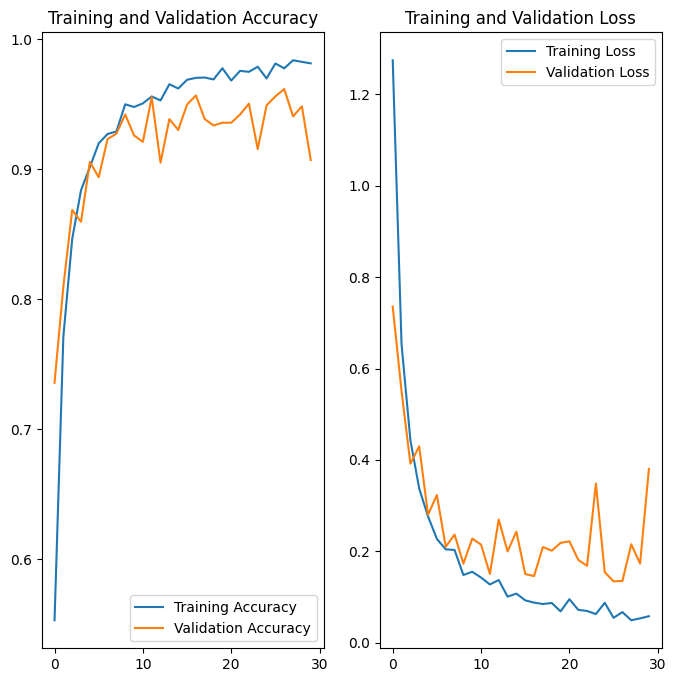

In [19]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato_Bacterial_spot
predicted label: Tomato_Bacterial_spot


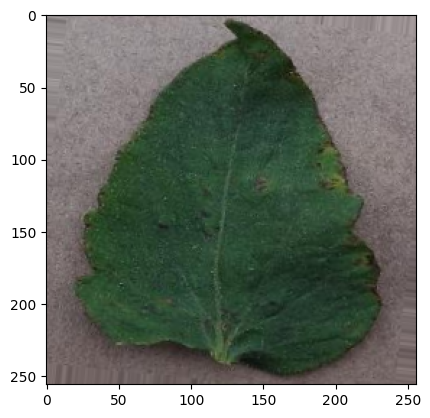

In [20]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

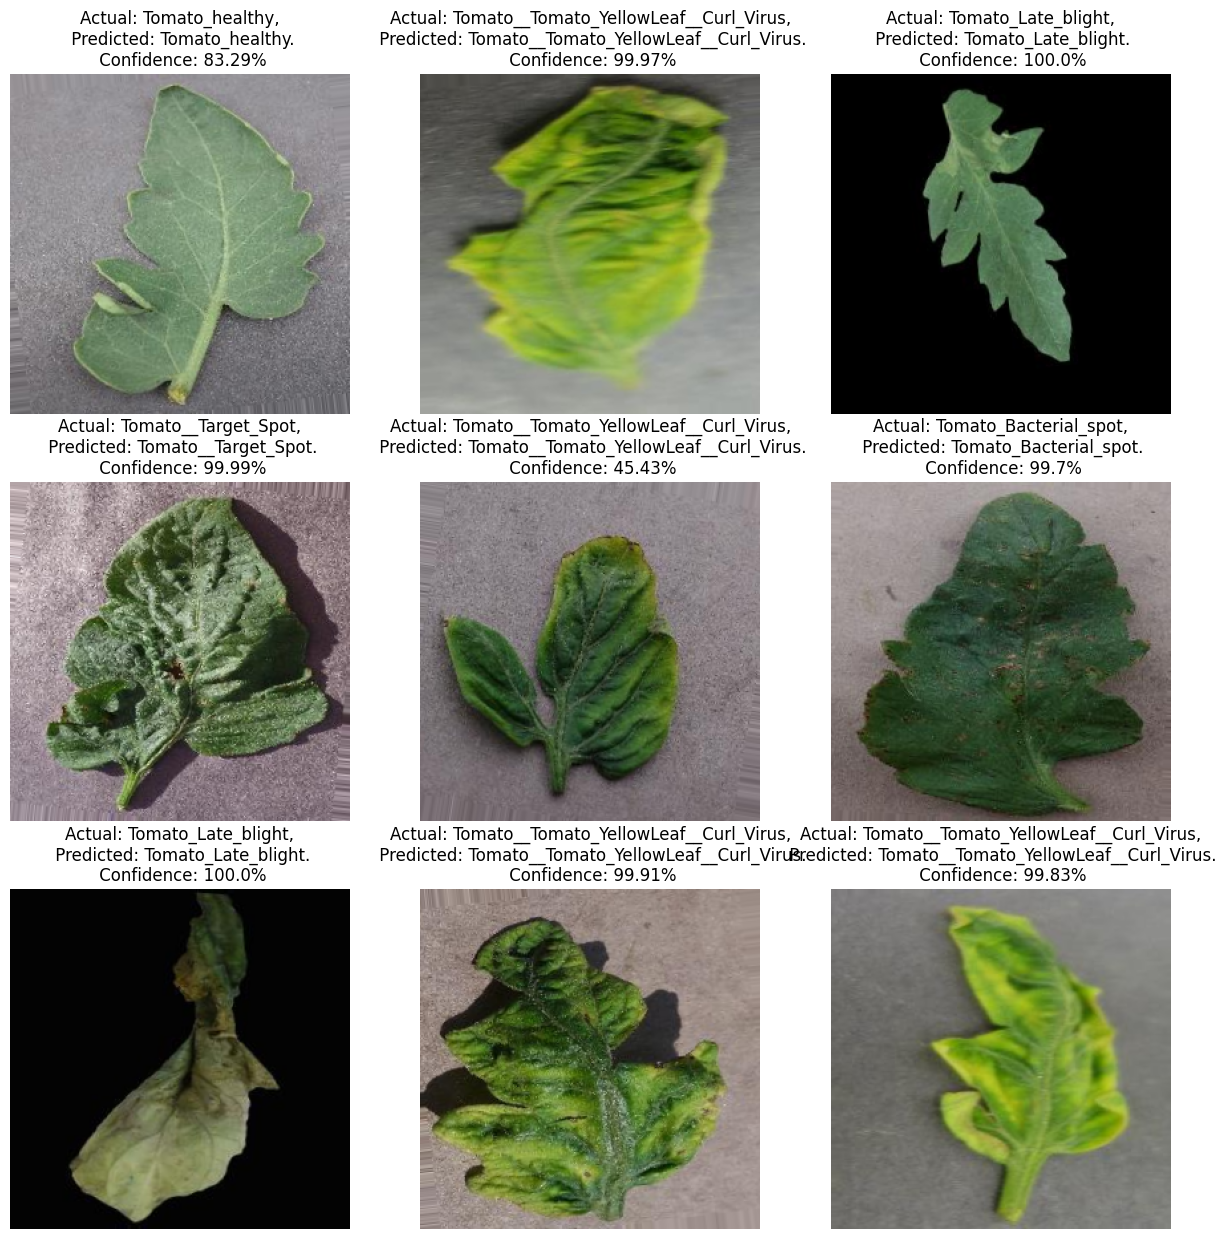

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [23]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")
model.save("../tomatoes_model1.h5")

INFO:tensorflow:Assets written to: ../models/4\assets


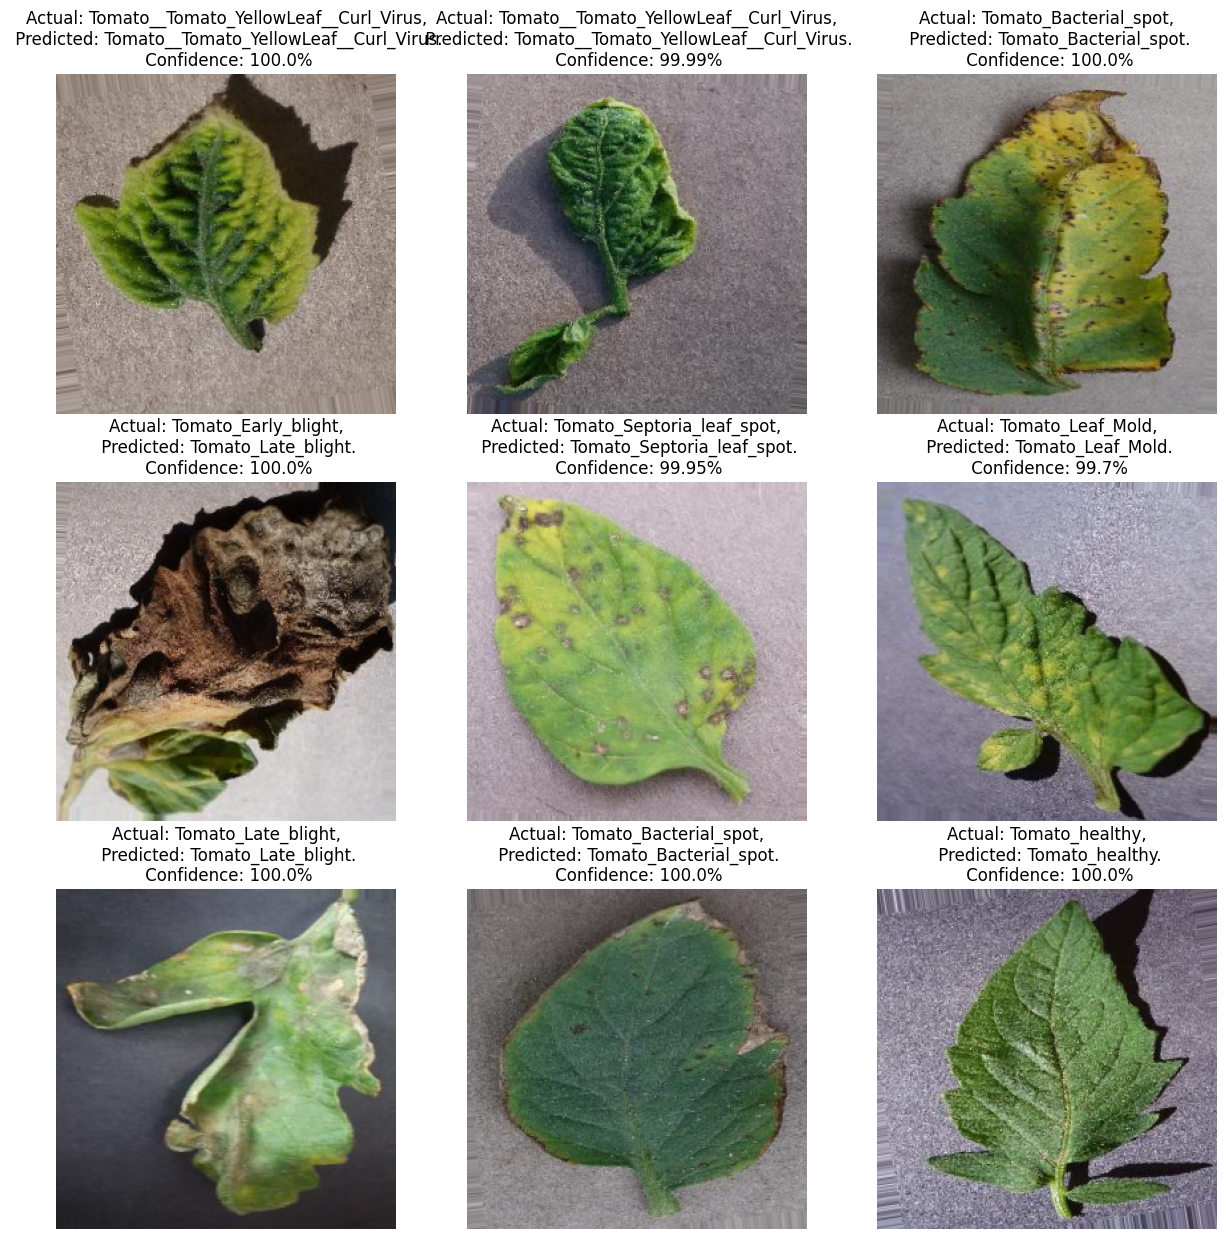

In [26]:
model = tf.keras.models.load_model("../models/2")
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break